In [ ]:
from trainer import SSMTrainer
import torch as T

device = T.device("cuda" if T.cuda.is_available() else "cpu")
ssm_trainer = SSMTrainer(
    env='CartPole-v1',
    embedding_size=64,
    state_space_size=256,
    reward_threshold=30,
    reward_target=475,
    lr=2e-4,
    gamma=0.95,
    entropy_coefficient=0.01,
    validation_length=100,
    max_episode_time=1500,
    dir='cartpole_ssm_only',
    device=device
    )

In [2]:
ssm_trainer.train()

Episode 1: Reward = 24.0
Episode 2: Reward = 35.0
Episode 3: Reward = 44.0
Episode 4: Reward = 44.0
Episode 5: Reward = 14.0
Episode 6: Reward = 14.0
Episode 7: Reward = 9.0
Episode 8: Reward = 31.0
Episode 9: Reward = 23.0
Episode 10: Reward = 19.0
Episode 11: Reward = 10.0
Episode 12: Reward = 11.0
Episode 13: Reward = 17.0
Episode 14: Reward = 10.0
Episode 15: Reward = 11.0
Episode 16: Reward = 9.0
Episode 17: Reward = 11.0
Episode 18: Reward = 9.0
Episode 19: Reward = 15.0
Episode 20: Reward = 29.0
Episode 21: Reward = 12.0
Episode 22: Reward = 14.0
Episode 23: Reward = 14.0
Episode 24: Reward = 18.0
Episode 25: Reward = 10.0
Episode 26: Reward = 19.0
Episode 27: Reward = 14.0
Episode 28: Reward = 12.0
Episode 29: Reward = 10.0
Episode 30: Reward = 12.0
Episode 31: Reward = 10.0
Episode 32: Reward = 19.0
Episode 33: Reward = 12.0
Episode 34: Reward = 19.0
Episode 35: Reward = 13.0
Episode 36: Reward = 9.0
Episode 37: Reward = 31.0
Episode 38: Reward = 10.0
Episode 39: Reward = 13.0

In [3]:
ssm_trainer.replay_live()

Live Replay Episode Reward: 897.0


In [4]:
df = ssm_trainer.compile_data()

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

df.head()

,recurrent_block.real_transition_matrix,recurrent_block.img_transition_matrix,recurrent_block.real_hidden_matrix,recurrent_block.img_hidden_matrix,recurrent_block.embedding_layer.weight,recurrent_block.output_gate.weight,recurrent_block.input_gate.0.weight,recurrent_block.input_gate.1.smoothness,recurrent_block.discretization_matrix.0.weight,recurrent_block.discretization_matrix.1.smoothness,...,recurrent_block.state_prediction.0.weight,recurrent_block.state_prediction.0.bias,recurrent_block.state_prediction.1.weight,recurrent_block.state_prediction.1.bias,recurrent_block.state_prediction.3.weight,recurrent_block.state_prediction.3.bias,training_steps,training_reward,validation_reward,loss
0,4.666590e-07,0.000007,0.000015,0.000007,0.016303,0.001207,0.031479,0.000072,1.020102e-06,5.595254e-08,...,0.379047,0.281565,0.025645,0.029433,0.169294,0.073386,24,24.0,0.0,-0.170922
1,2.947515e-07,0.000005,0.000009,0.000005,0.008837,0.000399,0.007881,0.000055,4.528643e-07,1.318729e-07,...,0.383980,0.288904,0.032220,0.030699,0.173887,0.073932,59,35.0,0.0,0.050569
2,7.960508e-07,0.000013,0.000018,0.000009,0.032292,0.001697,0.054050,0.000181,7.531259e-07,1.745596e-08,...,0.375557,0.275521,0.032919,0.029824,0.166999,0.065785,103,44.0,0.0,-0.308428
3,2.106314e-06,0.000034,0.000055,0.000029,0.083161,0.002874,0.070783,0.000124,2.433503e-06,7.272229e-07,...,0.374991,0.277220,0.032651,0.029510,0.183352,0.068408,147,44.0,0.0,-0.311319
4,2.893568e-07,0.000005,0.000017,0.000009,0.010000,0.000954,0.017730,0.000086,1.412950e-06,1.309170e-07,...,0.388156,0.290051,0.033280,0.031690,0.177672,0.075349,161,14.0,0.0,-0.666683


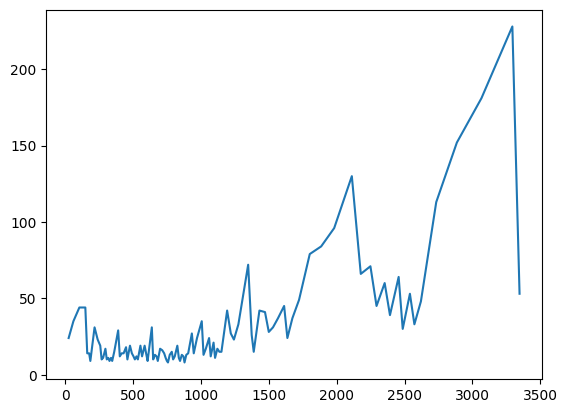

In [6]:
plt.plot(df['training_steps'],df['training_reward'])

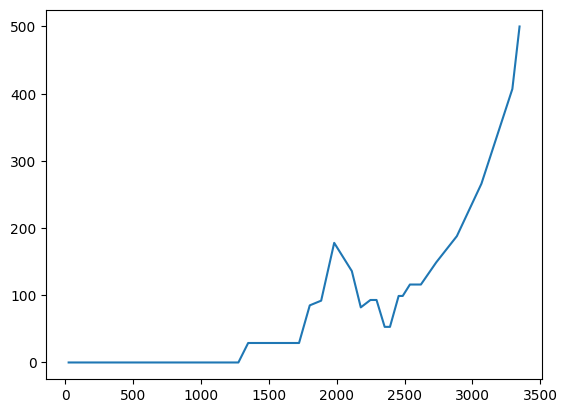

In [7]:
plt.plot(df['training_steps'],df['validation_reward'])